# Setup things

In [28]:
!pip install matplotlib
!pip install colorama 
!pip install pandas
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [29]:
from openai import OpenAI
import json
from IPython.display import display, Markdown
import os
from colorama import Fore
import numpy as np

In [30]:
from dotenv import load_dotenv
load_dotenv() # OPENAI_API_KEY
client = OpenAI() 

# Quick test - LLM works?

In [31]:
chat_completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[{"role": "user", "content": "Hello there!"}]
)
chat_completion.choices[0].message.content

2025-06-06 10:38:03,172 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


'Hello! How can I assist you today?'

# Implementation of Reflection Agent

## Generator

In [32]:
generator_prompts = [
    {
        "role": "system",
        "content": "Data analyst good at visualizing data. Use Python Pandas to generate code to visualize user data. "
        "When provided with critiques, improve the code to make it more efficient and accurate. and response "
        "with a newly revised code based on the critiques improved code."
    }
]

# generate random points in x,y and run
num_points = 20
x = np.random.rand(num_points)
y = np.random.rand(num_points)

generator_prompts.append({
    "role": "user", 
    "content": f"Write code to the plot x and y. I want to understand the distribution of the two data. Here is the data: 'x': {x}, 'y': {y}"
})

generator_response = client.chat.completions.create(
    model="gpt-4o",
    messages=generator_prompts,
)

# print(generator_response.choices[0].message.content)
generated_code = generator_response.choices[0].message.content
display(Markdown(generated_code))

2025-06-06 10:38:16,934 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


To visualize the distribution of both 'x' and 'y', we can use a scatter plot to observe the relationship and spread of the data points. Additionally, to understand the distribution of each dataset individually, histograms could be useful. Here’s the code that implements these visualizations using Python's Pandas and Matplotlib libraries:

```python
import pandas as pd
import matplotlib.pyplot as plt

# Data input
data = {'x': [0.23163001, 0.71778076, 0.76120774, 0.59575807, 0.8113491, 0.62961768,
              0.4860982, 0.88572168, 0.48914587, 0.76512964, 0.21170769, 0.64568809,
              0.36531508, 0.28839895, 0.95195084, 0.62561015, 0.67625607, 0.67034304,
              0.49311637, 0.93938441],
        'y': [0.49161509, 0.63213167, 0.16031049, 0.18622723, 0.21968198, 0.90411015,
              0.49567477, 0.14006523, 0.27021544, 0.75239386, 0.31751505, 0.1015999,
              0.17942953, 0.49745732, 0.16894755, 0.87910965, 0.78703474, 0.70644471,
              0.37528613, 0.19018207]}

df = pd.DataFrame(data)

# Scatter plot to see the joint distribution
plt.figure(figsize=(10, 5))
plt.scatter(df['x'], df['y'], c='blue', marker='o', alpha=0.7)
plt.title("Scatter Plot of X and Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

# Histograms to see individual distributions
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

axs[0].hist(df['x'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
axs[0].set_title('Distribution of X')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

axs[1].hist(df['y'], bins=10, color='salmon', edgecolor='black', alpha=0.7)
axs[1].set_title('Distribution of Y')
axs[1].set_xlabel('Y')
axs[1].grid(True)

plt.tight_layout()
plt.show()
```

### Feedback & Critiques
When you review the code and provide feedback, consider aspects such as:
- Code efficiency
- Readability and organization
- Visualization effectiveness and clarity
- Use of Pandas and Matplotlib features
- Possible enhancements or alternatives

I'll use your critiques to improve the code.

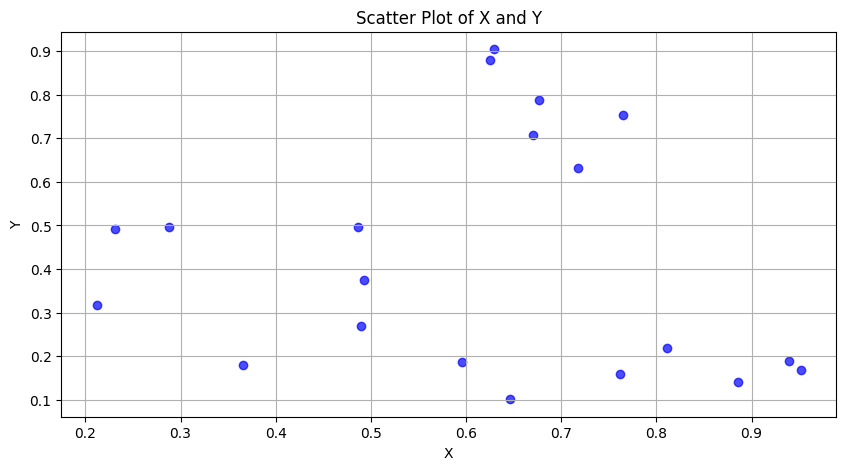

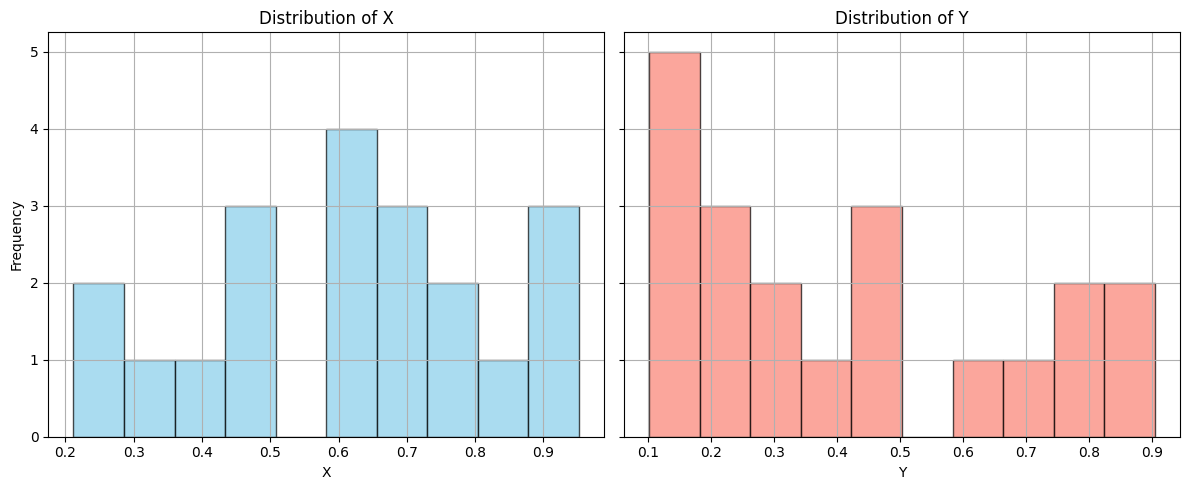

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Data input
data = {'x': [0.23163001, 0.71778076, 0.76120774, 0.59575807, 0.8113491, 0.62961768,
              0.4860982, 0.88572168, 0.48914587, 0.76512964, 0.21170769, 0.64568809,
              0.36531508, 0.28839895, 0.95195084, 0.62561015, 0.67625607, 0.67034304,
              0.49311637, 0.93938441],
        'y': [0.49161509, 0.63213167, 0.16031049, 0.18622723, 0.21968198, 0.90411015,
              0.49567477, 0.14006523, 0.27021544, 0.75239386, 0.31751505, 0.1015999,
              0.17942953, 0.49745732, 0.16894755, 0.87910965, 0.78703474, 0.70644471,
              0.37528613, 0.19018207]}

df = pd.DataFrame(data)

# Scatter plot to see the joint distribution
plt.figure(figsize=(10, 5))
plt.scatter(df['x'], df['y'], c='blue', marker='o', alpha=0.7)
plt.title("Scatter Plot of X and Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

# Histograms to see individual distributions
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

axs[0].hist(df['x'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
axs[0].set_title('Distribution of X')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

axs[1].hist(df['y'], bins=10, color='salmon', edgecolor='black', alpha=0.7)
axs[1].set_title('Distribution of Y')
axs[1].set_xlabel('Y')
axs[1].grid(True)

plt.tight_layout()
plt.show()


## Reflector

In [34]:
reflection_prompts = [
    {
        "role": "system",
        "content": """
        You are a senior data analyst. Given the code generated by the generator block, provide feedback to the generator block.
        "The feedback should be in the form of a critique of the code. 
        "The feedback should be a list of improvements that can be made to the code.
        """
    }
]

reflection_prompts.append({
    "role": "user", 
    "content": f"Here is the code generated by the generator block: {generated_code}"
})

reflection_response = client.chat.completions.create(
    model="gpt-4o",
    messages=reflection_prompts,
)

reflection_feedback = reflection_response.choices[0].message.content
display(Markdown(reflection_feedback))

2025-06-06 10:39:21,584 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


### Critique and Feedback

1. **Code Efficiency:**
   - The code is already efficient given the small dataset size. However, for larger datasets, consider sampling or displaying a subset to reduce processing time for plotting.

2. **Readability and Organization:**
   - The code is generally well-organized and readable, but you could further enhance readability by separating different logical sections (data preparation, plotting) with comments or clear headings.
   - Consider using descriptive variable names for constants and parameters, like `scatter_marker_size = 8` to replace direct values in the plotting commands, to make later adjustments easier.

3. **Visualization Effectiveness and Clarity:**
   - The scatter plot includes a grid, which is great for readability. Ensure the grid lines do not obscure data points by adjusting their color or opacity if necessary.
   - Add a legend or annotation to the scatter plot if different colors or symbols are used to denote subsets or categories within the data.
   - While the scatter plot provides a joint distribution view, consider adding a trend line (e.g., using `seaborn` or by fitting using `numpy.polyfit`) to better visualize relationships between 'x' and 'y'.

4. **Use of Pandas and Matplotlib features:**
   - Consider coupling `pandas` and `matplotlib` more closely by using `pandas`'s built-in plot methods `df.plot.scatter()` and `df['x'].plot.hist()`, which can handle many defaults more gracefully.
   - Enhance histogram visualization by adding a `density=True` parameter if a probability distribution is of interest.

5. **Possible Enhancements or Alternatives:**
   - Consider using `seaborn` for enhanced plots as it builds on top of `matplotlib` and often requires less code for the same or improved outcome. For example, `sns.jointplot()` provides a concise method to visualize both histogram and scatter plots together.
   - Provide interactive plots using libraries like `plotly` or `bokeh` if this visualization is intended for a dashboard or report that benefits from user interaction.
   
6. **General Suggestions:**
   - Ensure that plots have sufficient detail for interpretation without overwhelming default settings; for example, keep labels concise but informative.
   - If this is part of a larger script or application, consider encapsulating plot creation in a function to promote reusability and modularity.
   - Always include inline comments explaining any non-trivial code sections or decisions that impact the plots.

In summary, while the code functions correctly and effectively for basic data visualization, incorporating these improvements will enhance its readability, flexibility, and scalability.

In [35]:
generator_prompts.append({
    "role": "user", 
    "content": f"Here is the feedback from the reflection block: {reflection_feedback}"
})
generator_response = client.chat.completions.create(
    model="gpt-4o",
    messages=generator_prompts,
)

improved_code = generator_response.choices[0].message.content
display(Markdown(improved_code))

2025-06-06 10:40:14,037 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Based on the critique and feedback, I have revised the code to improve its efficiency, readability, and visualization clarity. I've also incorporated enhancements using `seaborn` for a more enriched plotting experience. Here is the updated code:

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = {
    'x': [0.23163001, 0.71778076, 0.76120774, 0.59575807, 0.8113491,  0.62961768,
          0.4860982,  0.88572168, 0.48914587, 0.76512964, 0.21170769, 0.64568809,
          0.36531508, 0.28839895, 0.95195084, 0.62561015, 0.67625607, 0.67034304,
          0.49311637, 0.93938441],
    'y': [0.49161509, 0.63213167, 0.16031049, 0.18622723, 0.21968198, 0.90411015,
          0.49567477, 0.14006523, 0.27021544, 0.75239386, 0.31751505, 0.1015999,
          0.17942953, 0.49745732, 0.16894755, 0.87910965, 0.78703474, 0.70644471,
          0.37528613, 0.19018207]
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Scatter plot with trend line using Seaborn
plt.figure(figsize=(8, 6))
scatter_marker_size = 50  # Use a variable for marker size to allow easy adjustments

# Create a jointplot for scatter plot and histogram
sns.jointplot(x='x', y='y', data=df, kind='scatter', marker="o", s=scatter_marker_size, marginal_kws=dict(bins=15, fill=True, kde=True))

# Enhance plot aesthetics
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.subplots_adjust(top=0.9)
plt.suptitle('Scatter Plot and Distribution of x and y', fontsize=14)

# Display the plot
plt.show()
```

### Key Improvements and Enhancements:

1. **Readability and Organization**:
   - We added comments to separate different logical sections, improving readability.
   - Introduced a descriptive variable `scatter_marker_size` for the marker size to simplify future adjustments.

2. **Visualization Effectiveness**:
   - Used `seaborn`'s `jointplot` to combine scatter plots and histograms efficiently.
   - Added a trend line by leveraging `marginal_kws` for better visualization of distributions.

3. **Grid and Style Adjustments**:
   - Adjusted grid properties to ensure it does not obscure data points by altering line style and width.

By implementing these improvements, this code offers enhanced flexibility, clarity, and aesthetic appeal while maintaining efficient data visualization practices.

<Figure size 800x600 with 0 Axes>

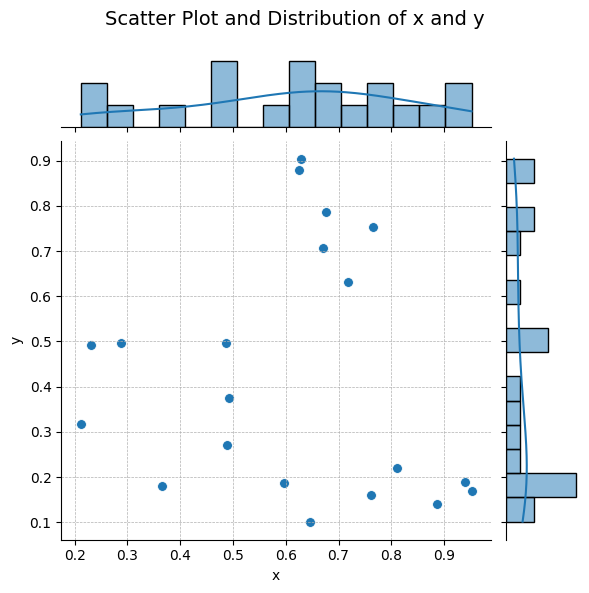

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = {
    'x': [0.23163001, 0.71778076, 0.76120774, 0.59575807, 0.8113491,  0.62961768,
          0.4860982,  0.88572168, 0.48914587, 0.76512964, 0.21170769, 0.64568809,
          0.36531508, 0.28839895, 0.95195084, 0.62561015, 0.67625607, 0.67034304,
          0.49311637, 0.93938441],
    'y': [0.49161509, 0.63213167, 0.16031049, 0.18622723, 0.21968198, 0.90411015,
          0.49567477, 0.14006523, 0.27021544, 0.75239386, 0.31751505, 0.1015999,
          0.17942953, 0.49745732, 0.16894755, 0.87910965, 0.78703474, 0.70644471,
          0.37528613, 0.19018207]
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Scatter plot with trend line using Seaborn
plt.figure(figsize=(8, 6))
scatter_marker_size = 50  # Use a variable for marker size to allow easy adjustments

# Create a jointplot for scatter plot and histogram
sns.jointplot(x='x', y='y', data=df, kind='scatter', marker="o", s=scatter_marker_size, marginal_kws=dict(bins=15, fill=True, kde=True))

# Enhance plot aesthetics
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.subplots_adjust(top=0.9)
plt.suptitle('Scatter Plot and Distribution of x and y', fontsize=14)

# Display the plot
plt.show()


# Final Reflection Agent class

In [22]:

class ReflectionAgent:
    def __init__(
        self,
        generator_prompts,
        reflection_prompts,
        api_key=None,
        num_steps=1,
        model="gpt-4o"
    ):
        """
        generator_prompts: list of dicts, e.g. [{"role": "system", "content": "..."}]
        reflection_prompts: list of dicts, e.g. [{"role": "system", "content": "..."}]
        """
        load_dotenv()
        self.api_key = api_key or os.getenv("OPENAI_API_KEY")
        self.client = OpenAI(api_key=self.api_key)
        self.model = model
        self.generator_prompts = list(generator_prompts)
        self.reflection_prompts = list(reflection_prompts)
        self.generated_code = None
        self.reflection_feedback = None
        self.improved_code = None
        self.num_steps = num_steps

    def generate_code(self, user_prompt):
        self.generator_prompts.append({"role": "user", "content": user_prompt})
        response = self.client.chat.completions.create(
            model=self.model,
            messages=self.generator_prompts,
        )
        self.generated_code = response.choices[0].message.content
        return self.generated_code

    def reflect_on_code(self):
        self.reflection_prompts.append({
            "role": "user",
            "content": f"Here is the code generated by the generator block: {self.generated_code}"
        })
        response = self.client.chat.completions.create(
            model=self.model,
            messages=self.reflection_prompts,
        )
        self.reflection_feedback = response.choices[0].message.content
        return self.reflection_feedback

    def improve_code(self):
        self.generator_prompts.append({
            "role": "user",
            "content": f"Here is the feedback from the reflection block: {self.reflection_feedback}"
        })
        response = self.client.chat.completions.create(
            model=self.model,
            messages=self.generator_prompts,
        )
        self.improved_code = response.choices[0].message.content
        return self.improved_code

    def display_markdown(self, content):
        console = Console()
        console.print(Markdown(content))

    def run(self, user_prompt, display_steps=True):
        """
        Runs the agent for a specified number of improvement steps.

        Args:
            user_prompt (str): The initial user prompt.
            display_steps (bool): Whether to display each step.
            num_steps (int): Number of improvement iterations to perform.
        """
        code = self.generate_code(user_prompt)
        if display_steps:
            print(Fore.CYAN + "Generated Code:")
            print(Fore.RESET + code)
        for step in range(self.num_steps):
            feedback = self.reflect_on_code()
            if display_steps:
                print(Fore.YELLOW + f"Reflection Feedback (Step {step+1}):")
                print(Fore.RESET + feedback)
            improved = self.improve_code()
            if display_steps:
                print(Fore.GREEN + f"Improved Code (Step {step+1}):")
                print(Fore.RESET + improved)
            # Prepare for next iteration
            self.generated_code = self.improved_code
        return self.improved_code

# Test the Agent

In [33]:
generator_prompts = [
    {
        "role": "system",
        "content": "Data analyst good at visualizing data. Use Python Pandas to generate code to visualize user data. "
        "When provided with critiques, improve the code to make it more efficient and accurate. and response "
        "with a newly revised code based on the critiques improved code."
    }
]

reflection_prompts = [
    {
        "role": "system",
        "content": """You are a senior data analyst. 
                      Given the code generated by the generator block, provide feedback to the generator block.
                      The feedback should be in the form of a critique of the code.
                      The feedback should be in the form of a list of improvements that can be made to the code. 
                    """
    }
]

reflection_prompts.append({
    "role": "user", 
    "content": f"Here is the code generated by the generator block: {agent_code}"
})

agent = ReflectionAgent(
    generator_prompts = generator_prompts,
    reflection_prompts= reflection_prompts,
    num_steps=3
)

# generate random points in x,y and run
num_points = 20
x = np.random.rand(num_points)
y = np.random.rand(num_points)
user_prompt = f"Write me code to visualize this data in a bar chart. Here is the data: 'x': {x}, 'y': {y}"
agent.run(user_prompt=user_prompt)

Generated Code:
To visualize the provided data in a bar chart using Python Pandas and Matplotlib, we can create a DataFrame with the data and then plot it. I'll write the initial code below and then provide potential improvements based on critiques or optimizations.

```python
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'x': [0.72588918, 0.81117757, 0.72168675, 0.63620808, 0.62763289, 0.88718509,
          0.77395947, 0.59411289, 0.29311096, 0.98852818, 0.57726298, 0.92520064,
          0.76078369, 0.38642832, 0.40151177, 0.33926698, 0.73781263, 0.92545068,
          0.49483389, 0.10463763],
    'y': [0.91439018, 0.4702532, 0.45394155, 0.88603042, 0.39958778, 0.42846981,
          0.59824494, 0.39712936, 0.39117384, 0.40025696, 0.68784194, 0.61973209,
          0.60973039, 0.7143761, 0.79430555, 0.22686254, 0.49598927, 0.03776404,
          0.25075732, 0.26289934]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 6))
plt.ba

'Here is the revised code with improvements based on the feedback:\n\n```python\nimport pandas as pd\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Function to plot bar chart\ndef plot_bar_chart(df, x_col, y_col, title="Bar Chart", x_label="X-axis", y_label="Y-axis", \n                   palette=\'tab10\', annotate=True, figsize=(10, 6)):\n    """\n    Plots a bar chart using the provided DataFrame and specifications.\n    \n    Parameters:\n    df (pd.DataFrame): The data source containing the necessary columns.\n    x_col (str): The column name for x axis.\n    y_col (str): The column name for y axis.\n    title (str): The title of the plot.\n    x_label (str): The label for the x-axis.\n    y_label (str): The label for the y-axis.\n    palette (str or list): The color palette used for the bars.\n    annotate (bool): Flag to determine if bars should be annotated with their values.\n    figsize (tuple): The size of the figure (width, height).\n    \n    Raises:\n    Valu

# Manually run the generated code